<a href="https://colab.research.google.com/github/sulimanbadour1/3d_Printing_code_phd/blob/main/YOLOv5_Object_Detection_Suliman_march.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content
%mkdir dataset
%cd ./dataset
!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="CetHCLetqq83339qHnY6")
project = rf.workspace("fdmprint").project("fdm_suli")
version = project.version(3)
dataset = version.download("yolov5")


/content
mkdir: cannot create directory ‘dataset’: File exists
/content/dataset
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fdm_suli-3 in yolov5pytorch:: 100%|██████████| 688/688 [00:00<00:00, 5542.20it/s]


In [3]:
# Step 4: Clone YOLOv5 and install dependencies
%cd /content
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install dependencies

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.12 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (11309/11309), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/4

In [5]:
# Assuming you know the number of classes and their names
number_of_classes = 5  # Replace with your actual number of classes
class_names = ['Blobs', 'Cracks', 'Spaghetti', 'Stringging','Under Extrusion']  # Replace with your actual class names

dataset_yaml = f"""
path: {dataset.location}  # dataset root dir
train: {dataset.location}/train/images  # train images
val: {dataset.location}/valid/images  # val images
test: {dataset.location}/test/images  # test images (optional)

# number of classes
nc: {number_of_classes}

# class names
names: {class_names}
"""
with open('data/dataset.yaml', 'w') as f:
    f.write(dataset_yaml)


In [6]:
# Step 5: Train the model
!python train.py --img 416 --batch 16 --epochs 50 --data data/dataset.yaml --weights yolov5s.pt --cache

2024-03-22 11:55:58.267671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 11:55:58.267788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 11:55:58.433120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False

In [7]:
# Step 6: Perform inference with the trained model
# Update this path if your weights are saved in a different location
weights_dir = '/content/yolov5/runs/train/exp/weights/best.pt'
!python detect.py --weights {weights_dir} --img 416 --conf 0.4 --source {dataset.location}/test/images/

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/dataset/fdm_suli-3/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/33 /content/dataset/fdm_suli-3/test/images/1-20-5-_jpg.rf.e046a21eb79d81ebeefe66aa2babbda4.jpg: 416x416 2 Blobss, 227.4ms
image 2/33 /content/dataset/fdm_suli-3/test/images/2-20-3-_png_jpg.rf.ba97e4f99ee99dcf21894cb11ebdfa1a.jpg: 416x416 (no detections), 214.4ms
image 3/33 /content/dataset/fdm_suli-3/test/im

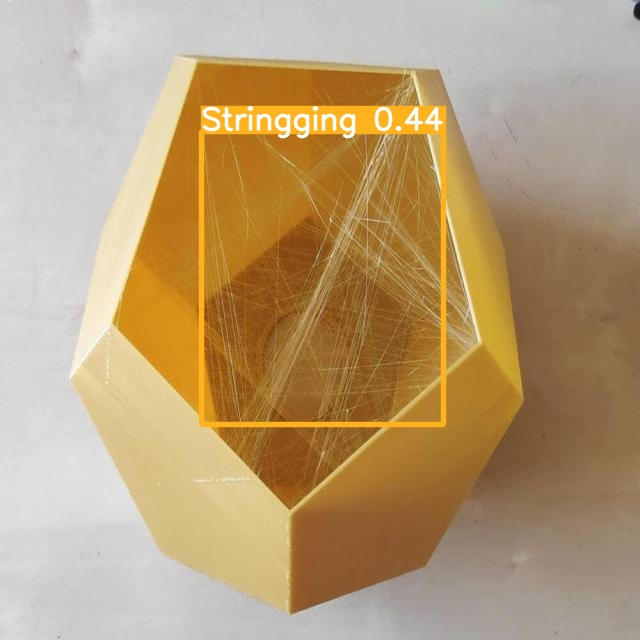

In [10]:
# Step 7: Display an inference result
from IPython.display import Image
import glob
import random

# Get a random image path from results
result_images = glob.glob('/content/yolov5/runs/detect/exp/*.jpg')
image_path = random.choice(result_images)

# Display the image
Image(filename=image_path)